## Random Imputation for Missing values

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("E:/Python and ML/Dataset/titanic_toy.csv", usecols = ["Age","Fare","Survived"])

In [6]:
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [7]:
df.isnull().mean() * 100

Age         19.865320
Fare         5.050505
Survived     0.000000
dtype: float64

In [8]:
X = df.drop(columns=["Survived"])
Y = df["Survived"]

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=41)

In [10]:
X_train

,Age,Fare
628,26.0,7.8958
300,NaN,7.7500
663,36.0,7.4958
50,7.0,39.6875
846,NaN,69.5500
...,...,...
407,3.0,18.7500
601,NaN,7.8958
243,22.0,7.1250
321,27.0,7.8958


In [11]:
X_train["Age_imputed"] = X_train["Age"]
X_test["Age_imputed"] = X_test["Age"]

In [12]:
X_test.tail()

,Age,Fare,Age_imputed
506,33.0,26.0000,33.0
648,NaN,7.5500,NaN
421,21.0,7.7333,21.0
879,56.0,83.1583,56.0
532,17.0,7.2292,17.0


In [13]:
X_train["Age_imputed"][X_train["Age_imputed"].isnull()] = X_train["Age"].dropna().sample(X_train["Age_imputed"].isnull().sum()).values

X_test["Age_imputed"][X_test["Age_imputed"].isnull()] = X_test["Age"].dropna().sample(X_test["Age_imputed"].isnull().sum()).values

C:\Users\HP\AppData\Local\Temp\ipykernel_27784\646241877.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train["Age_imputed"][X_train["Age_imputed"].isnull()] = X_train["Age"].dropna().sample(X_train["Age_imputed"].isnull().sum()).valu

In [14]:
X_train.tail()

,Age,Fare,Age_imputed
407,3.0,18.7500,3.0
601,NaN,7.8958,4.0
243,22.0,7.1250,22.0
321,27.0,7.8958,27.0
80,22.0,9.0000,22.0


In [15]:

X_train['Age'].isnull().sum()

np.int64(146)

In [16]:

X_train


,Age,Fare,Age_imputed
628,26.0,7.8958,26.0
300,NaN,7.7500,13.0
663,36.0,7.4958,36.0
50,7.0,39.6875,7.0
846,NaN,69.5500,33.0
...,...,...,...
407,3.0,18.7500,3.0
601,NaN,7.8958,4.0
243,22.0,7.1250,22.0
321,27.0,7.8958,27.0


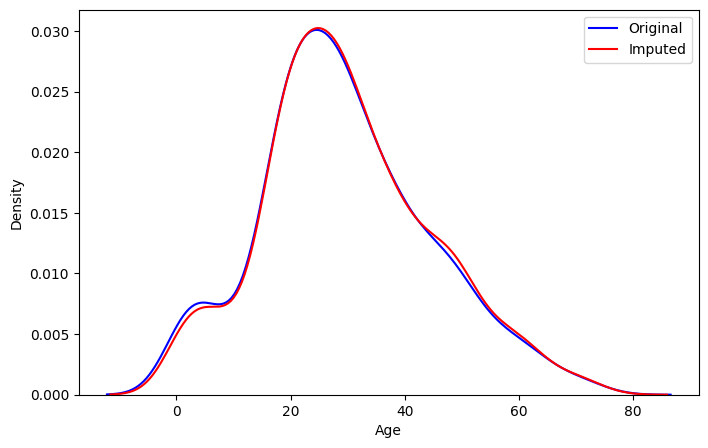

In [17]:
plt.figure(figsize=(8,5))

# Original Age Distribution

sns.kdeplot(X_train["Age"], color = "blue", label = "Original")

# Imputed Age Distribution

sns.kdeplot(X_train["Age_imputed"],color = "red", label = "Imputed")




plt.legend()
plt.show()


In [18]:
print("original Variable variance : ", X_train["Age"].var())
print("Variance after random Imputation: ", X_train["Age_imputed"].var())

original Variable variance :  221.4030195381344
Variance after random Imputation:  219.67441849823797


In [19]:
X_train[["Fare", "Age", "Age_imputed"]].cov()

,Fare,Age,Age_imputed
Fare,2095.926619,82.10703,62.716645
Age,82.107030,221.40302,221.403020
Age_imputed,62.716645,221.40302,219.674418


<Axes: >

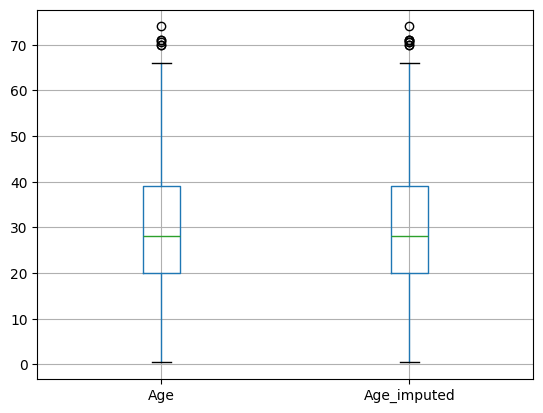

In [20]:
X_train[["Age", "Age_imputed"]].boxplot()

## Categorical data values imputation

In [21]:
data = pd.read_csv("E:/Python and ML/Dataset/train_1.csv", usecols=["GarageQual","FireplaceQu","SalePrice"])

In [22]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [23]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [24]:
X = data.drop(columns= "SalePrice")
Y = data["SalePrice"]

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 43)

In [26]:
X_train["GarageQual_imputed"] = X_train["GarageQual"]
X_test["GarageQual_imputed"] = X_test["GarageQual"]

X_train["FireplaceQu_imputed"] = X_train["FireplaceQu"]
X_test["FireplaceQu_imputed"] = X_test["FireplaceQu"]

In [27]:
X_train["GarageQual_imputed"][X_train["GarageQual_imputed"].isnull()] = X_train["GarageQual"].dropna().sample(X_train["GarageQual"].isnull().sum()).values
X_test["GarageQual_imputed"][X_test["GarageQual_imputed"].isnull()] = X_test["GarageQual"].dropna().sample(X_test["GarageQual"].isnull().sum()).values


X_train["FireplaceQu_imputed"][X_train["FireplaceQu_imputed"].isnull()] = X_train["FireplaceQu"].dropna().sample(X_train["FireplaceQu"].isnull().sum()).values
X_test["FireplaceQu_imputed"][X_test["FireplaceQu_imputed"].isnull()] = X_test["FireplaceQu"].dropna().sample(X_test["FireplaceQu"].isnull().sum()).values




C:\Users\HP\AppData\Local\Temp\ipykernel_27784\1129017351.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train["GarageQual_imputed"][X_train["GarageQual_imputed"].isnull()] = X_train["GarageQual"].dropna().sample(X_train["GarageQual"]

In [29]:
temp = pd.concat(
    [
       X_train["GarageQual"].value_counts()/len(X_train["GarageQual"].dropna()),
       X_train["GarageQual_imputed"].value_counts()/len(X_train)
    ],axis = 1

)

temp.columns = ["Original", "Imputed"]

In [31]:
temp

,Original,Imputed
TA,0.952813,0.952911
Fa,0.033575,0.032534
Gd,0.009074,0.008562
Ex,0.002722,0.003425
Po,0.001815,0.002568


In [32]:
temp_1 = pd.concat(
    
    [
        X_train["FireplaceQu"].value_counts()/len(X_train["FireplaceQu"].dropna()),
        X_train["FireplaceQu_imputed"].value_counts()/len(X_train)
    ], axis = 1
)
temp_1.columns = ["Original", "Imputed"]

In [33]:
temp_1

,Original,Imputed
Gd,0.504902,0.511130
TA,0.400327,0.393836
Fa,0.040850,0.040240
Ex,0.029412,0.030822
Po,0.024510,0.023973


In [ ]:
for category in X_train["GarageQual"].dropna().unique():
    sns.displot(X_train[X_train["GarageQual"] == category]["SalePrice"])